In [1]:
import pandas as pd
import plotly.express as px

In [60]:
ps4 = pd.read_csv("../data/processed/ps4.csv").dropna()
ps4

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,tag
0,Grand Theft Auto V,2014,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,PS4
1,Call of Duty: Black Ops 3,2015,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,PS4
2,Red Dead Redemption 2,2018,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,PS4
3,Call of Duty: WWII,2017,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,PS4
4,FIFA 18,2017,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,PS4
...,...,...,...,...,...,...,...,...,...,...
820,Biomutant,2019,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00,PS4
821,de Blob,2017,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00,PS4
822,Chaos on Deponia,2017,Adventure,Daedalic Entertainment,0.00,0.00,0.00,0.00,0.00,PS4
823,Code Vein,2018,Action,Bandai Namco Entertainment,0.00,0.00,0.00,0.00,0.00,PS4


In [72]:
ps4_NA = ps4[["Year", "North America"]].groupby(['Year']).sum().head(6).rename(columns={"North America": "ps4"})
ps4_NA

,ps4
Year,
2013,10.35
2014,39.80
2015,49.60
2016,47.40
2017,44.77
2018,19.65


In [61]:
xbox = pd.read_csv("../data/processed/xbox.csv").dropna()
xbox

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,tag
0,Grand Theft Auto V,2014,Action,Rockstar Games,4.70,3.25,0.01,0.76,8.72,Xbox
1,Call of Duty: Black Ops 3,2015,Shooter,Activision,4.63,2.04,0.02,0.68,7.37,Xbox
2,Call of Duty: WWII,2017,Shooter,Activision,3.75,1.91,0.00,0.57,6.23,Xbox
3,Red Dead Redemption 2,2018,Action-Adventure,Rockstar Games,3.76,1.47,0.00,0.54,5.77,Xbox
4,MineCraft,2014,Misc,Microsoft Studios,3.23,1.71,0.00,0.49,5.43,Xbox
...,...,...,...,...,...,...,...,...,...,...
500,Biomutant,2018,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00,Xbox
501,Biomutant,2019,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00,Xbox
502,de Blob,2017,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00,Xbox
503,Outcast: Second Contact,2017,Adventure,Bigben Interactive,0.00,0.00,0.00,0.00,0.00,Xbox


In [71]:
xbox_NA = xbox[["Year", "North America"]].groupby(['Year']).sum().reset_index().head(6).rename(columns={"North America": "xbox"})
xbox_NA

,Year,xbox
0,2013,12.14
1,2014,35.92
2,2015,42.16
3,2016,34.19
4,2017,30.06
5,2018,8.21


In [73]:
sales_NA = ps4_NA.join(xbox_NA.set_index('Year'), on = "Year").reset_index()
sales_NA

,Year,ps4,xbox
0,2013,10.35,12.14
1,2014,39.80,35.92
2,2015,49.60,42.16
3,2016,47.40,34.19
4,2017,44.77,30.06
5,2018,19.65,8.21


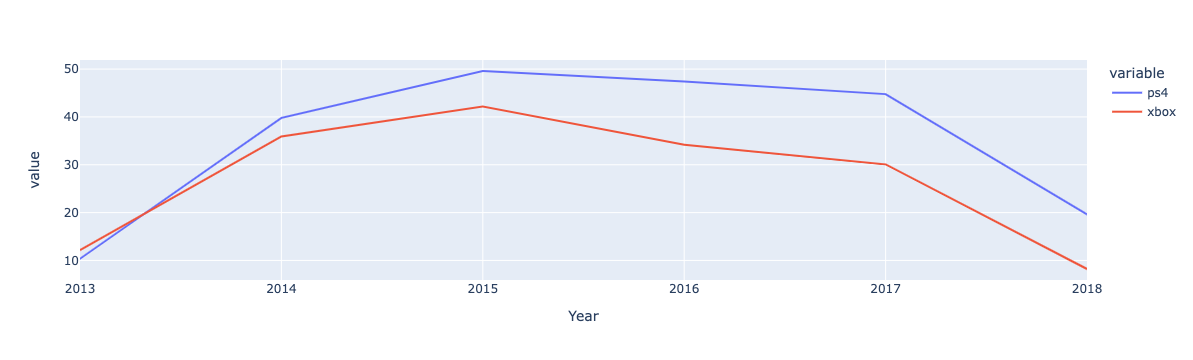

In [74]:
fig = px.line(sales_NA, x="Year", y=["ps4", "xbox"])
fig.show()

In [89]:
ps4_global = ps4[["Year", "Global"]].groupby(['Year']).sum().head(6).rename(columns={"Global": "ps4"})
ps4_global

,ps4
Year,
2013,28.76
2014,115.85
2015,133.99
2016,135.72
2017,130.90
2018,50.20


In [90]:
xbox_global = xbox[["Year", "Global"]].groupby(['Year']).sum().reset_index().head(6).rename(columns={"Global": "xbox"})
xbox_global

,Year,xbox
0,2013,20.03
1,2014,62.12
2,2015,68.61
3,2016,57.37
4,2017,48.51
5,2018,12.20


In [91]:
sales_global = ps4_global.join(xbox_global.set_index('Year'), on = "Year").reset_index()
sales_global

,Year,ps4,xbox
0,2013,28.76,20.03
1,2014,115.85,62.12
2,2015,133.99,68.61
3,2016,135.72,57.37
4,2017,130.90,48.51
5,2018,50.20,12.20


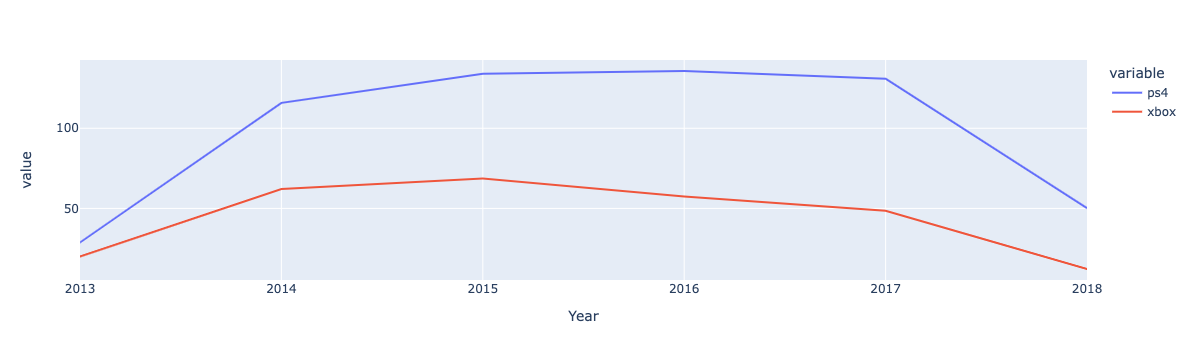

In [93]:
fig2 = px.line(sales_global, x="Year", y=["ps4", "xbox"])
fig2.show()

In [84]:
def NA_sales_chart(company):
    fig = px.line(sales_NA, 
        x="Year", y=company)
    return fig

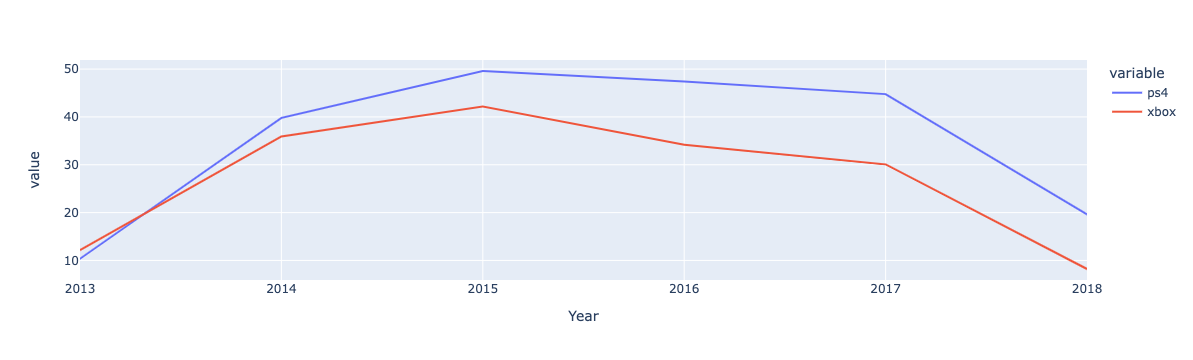

In [86]:
NA_sales_chart(['ps4', 'xbox'])

In [107]:
def NA_sales_chart(company, years):
    sales_NA_year = sales_NA.set_index(["Year"])
    sales_NA_new = sales_NA_year.loc[years[0]:years[1]].reset_index()
    fig = px.line(sales_NA_new, 
        x="Year", y=company)
    return fig

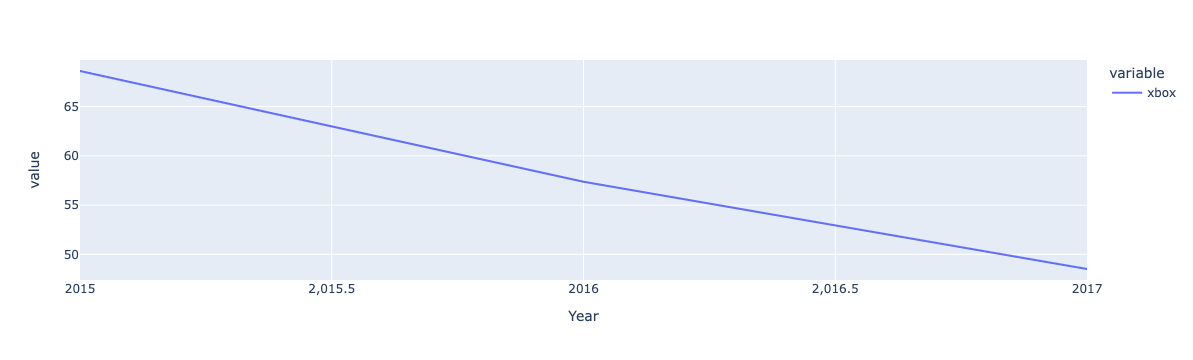

In [127]:
NA_sales_chart(['xbox'], [2015, 2017])

In [123]:
def global_sales_chart(company, years):
    sales_global_year = sales_global.set_index(["Year"])
    sales_global_new = sales_global_year.loc[years[0]:years[1]].reset_index()
    fig = px.line(sales_global_new, 
        x="Year", y=company)
    return fig

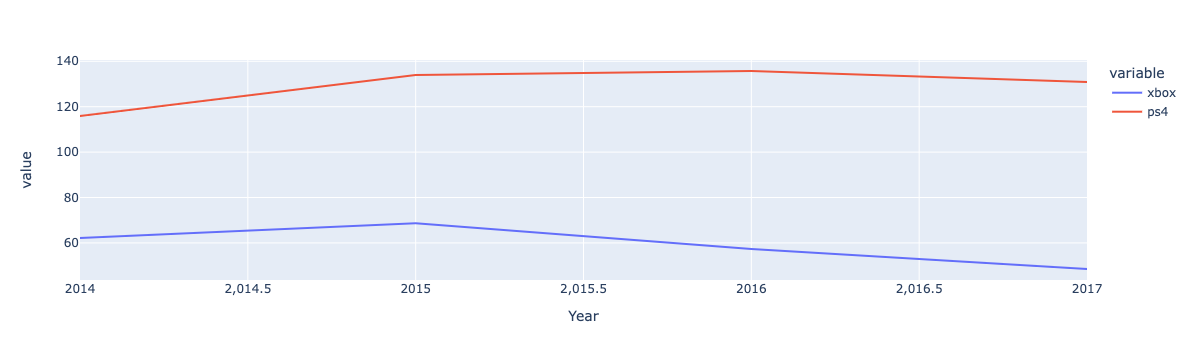

In [125]:
global_sales_chart(['xbox', 'ps4'], [2014, 2017])